In [1]:
import sys
import numpy as np
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline
dt=0.1



Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

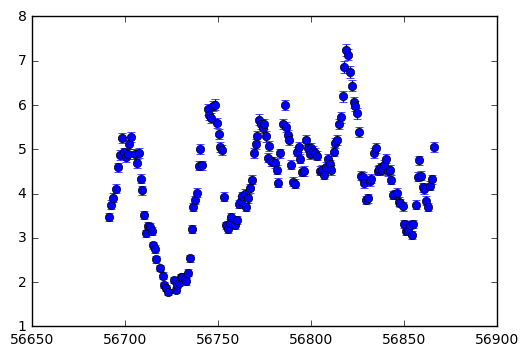

In [49]:
dt=0.1
t1,l1,l1e = np.loadtxt('lightcurves/1158Å.lc',skiprows=1).T
errorbar(t1,l1,yerr=l1e,fmt='o')


In [52]:
fqL_comp = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
f1 = 1/175.
f2 = 0.5/dt
fqL = np.logspace(np.log10(0.0049999999),np.log10(0.62032418),9)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)
fqL_comp,fqL

(array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
         0.16658029,  0.25819945,  0.40020915,  0.62032418]),
 array([ 0.005     ,  0.00913432,  0.01668715,  0.03048514,  0.0556922 ,
         0.10174204,  0.18586882,  0.33955695,  0.62032418]))

In [53]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 7.185e+01 inf -- -5.566e+02 -- 1 1 1 1 1 1 1 1
   2 7.678e-01 7.159e+01 8.229e+01 -- -4.743e+02 -- 0.892884 0.567082 0.621861 0.584768 0.568247 0.566791 0.565861 0.565797
   3 3.310e+00 7.118e+01 7.982e+01 -- -3.945e+02 -- 0.843736 0.174437 0.33062 0.197899 0.141909 0.135208 0.132001 0.131356
   4 1.589e+00 7.054e+01 7.609e+01 -- -3.184e+02 -- 0.77937 -0.0873774 0.197955 -0.122663 -0.270114 -0.292617 -0.301204 -0.303378
   5 5.880e-01 6.947e+01 7.164e+01 -- -2.468e+02 -- 0.733533 -0.195146 0.207496 -0.317627 -0.648339 -0.712483 -0.73341 -0.738142
   6 3.685e-01 6.733e+01 6.557e+01 -- -1.812e+02 -- 0.72869 -0.287616 0.235962 -0.380797 -0.950045 -1.11118 -1.16248 -1.17217
   7 3.360e-01 6.281e+01 5.634e+01 -- -1.248e+02 -- 0.734242 -0.391207 0.261934 -0.403085 -1.11909 -1.45604 -1.58125 -1.60409
   8 3.292e-01 5.377e+01 4.358e+01 -- -8.126e+01 -- 0.752973 -0.522649 0.291579 -0.418537 -1.16671 -1.69479 -1.97145 -2.03079
   9 3.273e-01 3.879e+01 2.815e+01 -- -5.312e+01 -- 0.

In [48]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ -3.127e+01 -3.468e+01 8.423e-01 1.842e+00 6.83 +++
+++ -3.127e+01 -3.236e+01 8.423e-01 1.342e+00 2.19 +++
+++ -3.127e+01 -3.158e+01 8.423e-01 1.092e+00 0.635 +++
+++ -3.127e+01 -3.193e+01 8.423e-01 1.217e+00 1.32 +++
+++ -3.127e+01 -3.174e+01 8.423e-01 1.155e+00 0.955 +++
+++ -3.127e+01 -3.183e+01 8.423e-01 1.186e+00 1.13 +++
+++ -3.127e+01 -3.179e+01 8.423e-01 1.170e+00 1.04 +++
+++ -3.127e+01 -3.177e+01 8.423e-01 1.163e+00 0.998 +++
	### errors for param 1 ###
+++ -3.127e+01 -3.127e+01 -6.142e+00 -3.142e+00 0.00153 +++
+++ -3.127e+01 -3.129e+01 -6.142e+00 -1.642e+00 0.0501 +++
+++ -3.127e+01 -3.142e+01 -6.142e+00 -8.925e-01 0.304 +++
+++ -3.127e+01 -3.163e+01 -6.142e+00 -5.175e-01 0.724 +++
+++ -3.127e+01 -3.181e+01 -6.142e+00 -3.300e-01 1.08 +++
+++ -3.127e+01 -3.171e+01 -6.142e+00 -4.237e-01 0.888 +++
+++ -3.127e+01 -3.176e+01 -6.142e+00 -3.768e-01 0.981 +++
+++ -3.127e+01 -3.178e+01 -6.142e+00 -3.534e-01 1.03 +++
+++ -3.127e+01 -3.177e+01 -6.142e+00

In [54]:
lc2_time, lc2_strength, lc2_strength_err = np.loadtxt('lightcurves/1367Å.lc',skiprows=1).T
P2  = clag.clag('psd10r', [lc2_time], [lc2_strength], [lc2_strength_err], dt, fqL)
echo_psd = np.ones(nfq)
echo_psd, echo_psd_err = clag.optimize(P2, echo_psd)
echo_psd, echo_psd_err = clag.errors(P2, echo_psd, echo_psd_err)

   1 4.342e-01 7.192e+01 inf -- -5.528e+02 -- 1 1 1 1 1 1 1 1
   2 7.677e-01 7.172e+01 8.314e+01 -- -4.696e+02 -- 0.78293 0.568703 0.600684 0.57668 0.566873 0.566275 0.565811 0.56578
   3 3.308e+00 7.142e+01 8.128e+01 -- -3.884e+02 -- 0.689764 0.16171 0.257918 0.170439 0.136255 0.133411 0.131785 0.131434
   4 1.435e+00 7.097e+01 7.825e+01 -- -3.101e+02 -- 0.631013 -0.146679 0.0380676 -0.194555 -0.28697 -0.297374 -0.3018 -0.303285
   5 1.893e+00 7.030e+01 7.448e+01 -- -2.356e+02 -- 0.572477 -0.273973 -0.013521 -0.46889 -0.691645 -0.723892 -0.734606 -0.738407
   6 2.036e+00 6.915e+01 6.997e+01 -- -1.657e+02 -- 0.556114 -0.338327 0.0120697 -0.601529 -1.05194 -1.14054 -1.16577 -1.17376
   7 7.527e-01 6.678e+01 6.326e+01 -- -1.024e+02 -- 0.559718 -0.419601 0.0366427 -0.638502 -1.31524 -1.52984 -1.59139 -1.60925
   8 4.844e-01 6.180e+01 5.335e+01 -- -4.904e+01 -- 0.572287 -0.509058 0.064224 -0.659378 -1.43703 -1.85444 -2.00096 -2.04514
   9 3.410e-01 5.187e+01 4.022e+01 -- -8.822e+00 -- 0.59

In [ ]:
Cx = clag.clag('cxd10r',
				[[t1,lc2_time]], 
            	[[l1,lc2_strength]],
            	[[l1e,lc2_strength_err]], 
               dt, fqL, p1, echo_psd)
Cx_vals = np.concatenate( ((p1+echo_psd)*0.5-0.3,p1*0+0.1) )
Cx_vals, Cx_err = clag.optimize(Cx, Cx_vals)
Cx_vals, Cx_err = clag.errors(Cx,Cx_vals,Cx_err)

   1 5.461e+03 3.129e+01 inf -- 4.856e+01 -- 0.464251 -4.03807 0.0189921 -0.850855 -1.60053 -2.31608 -2.97227 -6.29099 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 3.519e+02 3.652e+01 5.611e+00 -- 5.417e+01 -- 0.508103 -3.73807 0.0630969 -0.807781 -1.55655 -2.26976 -2.91554 -5.99099 0.0831503 -0.12046 0.0924967 0.0835327 0.0864669 0.0914705 0.12176 -1.83901
   5 7.675e+03 4.162e+01 5.370e+00 -- 5.954e+01 -- 0.543533 -3.43807 0.0986035 -0.77279 -1.52096 -2.23246 -2.87084 -6.29099 0.071137 1.92324 0.0869798 0.071687 0.0766693 0.0855272 0.137156 -0.0818335
   7 2.888e+03 4.712e+01 5.063e+00 -- 6.460e+01 -- 0.572736 -3.73807 0.127803 -0.743828 -1.49161 -2.20179 -2.83464 -5.99099 0.0621946 -1.91332 0.0827026 0.0628067 0.0692656 0.0811878 0.148771 -0.109333
   9 2.716e+03 5.373e+01 4.853e+00 -- 6.945e+01 -- 0.597166 -3.43807 0.152192 -0.719514 -1.46702 -2.17614 -2.80474 -5.69099 0.0553467 -2.61833 0.0793112 0.055933 0.0634971 0.0779338 0.157976 0.0487899
  11 2.390e+01 6.074e+01 4.663e+00 -- 7.412e+